# Ford's Go bike system data communication

### Introduction 

This project aims to show the importance of data visualization as a part of the data analysis process. This project will consist of data gathering, assesment and cleaning that will be done on one of the provided data sets, and will be concluded by using the pyhton visualization libraries to make conclusions.

###  Importing python libraries

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import figure
from matplotlib.pyplot import figure
from matplotlib.ticker import FuncFormatter
import seaborn as sns
import seaborn as sb
from matplotlib.pyplot import figure
%matplotlib inline
import calendar

###  Data gathering

In [2]:
ford_data=pd.read_csv('ford_data.csv')

ford_data

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183407,480,2019-02-01 00:04:49.7240,2019-02-01 00:12:50.0340,27.0,Beale St at Harrison St,37.788059,-122.391865,324.0,Union Square (Powell St at Post St),37.788300,-122.408531,4832,Subscriber,1996.0,Male,No
183408,313,2019-02-01 00:05:34.7440,2019-02-01 00:10:48.5020,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,66.0,3rd St at Townsend St,37.778742,-122.392741,4960,Subscriber,1984.0,Male,No
183409,141,2019-02-01 00:06:05.5490,2019-02-01 00:08:27.2200,278.0,The Alameda at Bush St,37.331932,-121.904888,277.0,Morrison Ave at Julian St,37.333658,-121.908586,3824,Subscriber,1990.0,Male,Yes
183410,139,2019-02-01 00:05:34.3600,2019-02-01 00:07:54.2870,220.0,San Pablo Ave at MLK Jr Way,37.811351,-122.273422,216.0,San Pablo Ave at 27th St,37.817827,-122.275698,5095,Subscriber,1988.0,Male,No


###  Data assesment 

In [3]:
ford_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [4]:
ford_data.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [5]:
ford_data.duplicated().sum()

0

####  Assesment summary

#### quality issues:
1- convert start_time ,end_time columns to type date time 

2- dropping null values recorded as NaNTidiness

3- Add weekday, startpoint, endpoint, minutes and age columns to the data set

### Data cleaning 

### 1. Define

convert start_time ,end_time columns to type date time 

### 2. Code

In [55]:
## changing the data type to datetime
ford_data.start_time = pd.to_datetime(ford_data.start_time)
ford_data.end_time = pd.to_datetime(ford_data.end_time)

### 3. Test

In [56]:
print(ford_data.start_time.dtype)
print(ford_data.end_time.dtype)

datetime64[ns]
datetime64[ns]


### 1. Define

dropping null values 

### 2. Code

In [59]:
## dropping null values
ford_data = ford_data.dropna()

### 3. Test

In [60]:
ford_data.isnull().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
weekday                    0
startpoint                 0
endpoint                   0
minutes                    0
ages                       0
dtype: int64

### 1. Define

Add weekday, startpoint, endpoint, minutes and age columns to the data set. the values were taken from the start_time , end_time, duration_sec and member_birth_year respectively

### 2. Code

In [61]:
## extracting days from the start_time values
ford_data['weekday'] = ford_data['start_time'].dt.strftime('%a')

In [62]:
## extracting starting hours from the start_time values
ford_data['startpoint'] = ford_data['start_time'].dt.hour

In [63]:
## extracting end hours from the start_time values
ford_data['endpoint'] = ford_data['end_time'].dt.hour

In [64]:
## extracting minutes from the start_time values
ford_data['minutes'] = ford_data['duration_sec']/60

In [65]:
## extracting days from the the the member_birth_years
ford_data['ages'] = 2021 - ford_data['member_birth_year']

### 3. Test

In [67]:
print(ford_data.columns)

Index(['duration_sec', 'start_time', 'end_time', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type',
       'member_birth_year', 'member_gender', 'bike_share_for_all_trip',
       'weekday', 'startpoint', 'endpoint', 'minutes', 'ages'],
      dtype='object')


In [69]:
## checking the values of the member_gender column
ford_data['member_gender'].value_counts()

Male      130500
Female     40805
Name: member_gender, dtype: int64

The age column has an extra value that will be dropped

In [70]:
drop_other = ford_data[ford_data['member_gender']=='Other'].index
ford_data = ford_data.drop(index=drop_other)

In [71]:
ford_data['member_gender'].value_counts()

Male      130500
Female     40805
Name: member_gender, dtype: int64

In [72]:
ford_data['user_type'].value_counts()

Subscriber    155189
Customer       16116
Name: user_type, dtype: int64

### Data set structure

In [73]:
ford_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 171305 entries, 0 to 183411
Data columns (total 21 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             171305 non-null  int64         
 1   start_time               171305 non-null  datetime64[ns]
 2   end_time                 171305 non-null  datetime64[ns]
 3   start_station_id         171305 non-null  float64       
 4   start_station_name       171305 non-null  object        
 5   start_station_latitude   171305 non-null  float64       
 6   start_station_longitude  171305 non-null  float64       
 7   end_station_id           171305 non-null  float64       
 8   end_station_name         171305 non-null  object        
 9   end_station_latitude     171305 non-null  float64       
 10  end_station_longitude    171305 non-null  float64       
 11  bike_id                  171305 non-null  int64         
 12  user_type       

In [74]:
ford_data.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year,startpoint,endpoint,minutes,ages
count,171305.000000,171305.00000,171305.000000,171305.000000,171305.000000,171305.000000,171305.000000,171305.000000,171305.000000,171305.000000,171305.000000,171305.000000,171305.000000
mean,697.757981,138.70695,37.770629,-122.351657,136.304889,37.770831,-122.351225,4481.294136,1984.839351,13.451545,13.605546,11.629300,36.160649
std,1577.253741,111.71479,0.101225,0.118522,111.421147,0.101130,0.118088,1659.524197,10.116083,4.733722,4.747156,26.287562,10.116083
min,61.000000,3.00000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000,0.000000,0.000000,1.016667,20.000000
25%,322.000000,47.00000,37.770083,-122.411901,44.000000,37.770407,-122.411647,3796.000000,1980.000000,9.000000,9.000000,5.366667,29.000000
50%,509.000000,104.00000,37.780760,-122.398279,100.000000,37.781010,-122.397437,4960.000000,1987.000000,14.000000,14.000000,8.483333,34.000000
75%,787.000000,239.00000,37.797280,-122.283127,237.000000,37.797320,-122.287610,5505.000000,1992.000000,17.000000,18.000000,13.116667,41.000000
max,84548.000000,398.00000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000,23.000000,23.000000,1409.133333,143.000000


The data set has 21 coulmns and 171,305 rows. The data set has numerical coulmns such as duration_sec, member_birth_year and start_hour and categorical columns like user_type, member_gender and start_of_weekday.

### Univariate Exploration

Univariate analysis is the simplest form of data analysis where the data being analyzed consists of only one variable and the relation between its values. In this section, univariate analysis will be done on columns such user_types, duration_minites and start_of_weekday to name a few  

### Q1: which user type is more frequent?

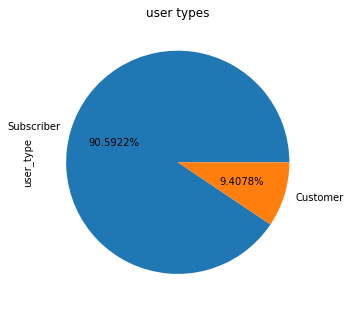

In [75]:
ford_data.user_type.value_counts().plot.pie(figsize=(5,6), autopct='%.4f%%')
plt.title('user types')
plt.show()

We can see that the majority of the users are subscribed to the service, with a percentage of 90.5% 

### Q2: what the the average duration for a single trip ?

Text(0, 0.5, 'Number of Trips')

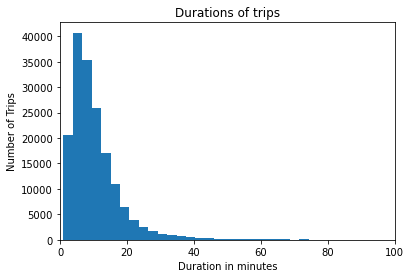

In [76]:
plt.hist(data = ford_data, x = 'minutes', bins = 500)
plt.xlim(xmin=0, xmax = 100)
plt.title('Durations of trips')
plt.xlabel('Duration in minutes')
plt.ylabel('Number of Trips')

Most of the trips take around 10 - 20 minutes to complete

### Q3: which day of the week has the highest number of trips ?

Text(0, 0.5, 'number')

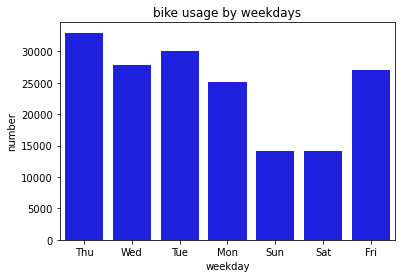

In [77]:
sb.countplot(data=ford_data, x='weekday' ,color='blue');
plt.title('bike usage by weekdays')
plt.xlabel('weekday')
plt.ylabel('number')

Most of the trips are taken on thrusdays , with around 3000 trips each week

### Q4: during which hour are most of the trips taken ?

Text(0, 0.5, 'number')

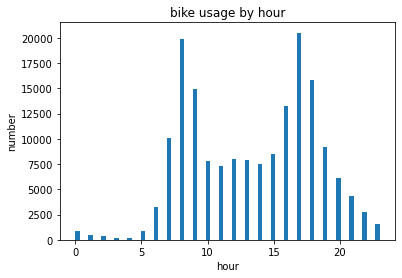

In [78]:
plt.hist(data = ford_data, x = 'startpoint', bins = 70);
plt.title('bike usage by hour')
plt.xlabel('hour')
plt.ylabel('number')

from this plot , we can see that there are trips are usually taken in the morning at 8AM , or during the afternoon at 5PM

### Q5: what are the average ages of the users ? 

Text(0, 0.5, 'number')

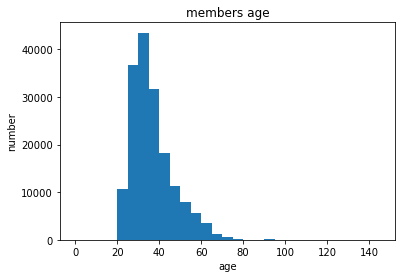

In [79]:
bins = np.arange(0, ford_data['ages'].max()+5, 5)
plt.hist(data = ford_data , x = 'ages', bins = bins)
plt.title('members age')
plt.xlabel('age')
plt.ylabel('number')

This plot shows that the main age group of users is from 20-40 years old

### Q6: are most of the users males or females ?

Text(0, 0.5, 'number')

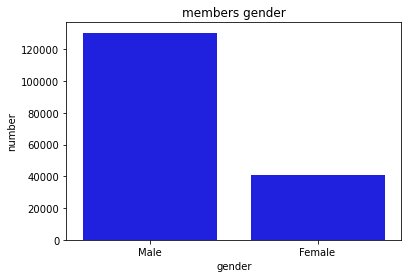

In [80]:
sb.countplot(data=ford_data, x='member_gender', color='blue');
plt.title('members gender')
plt.xlabel('gender')
plt.ylabel('number')

The majority of the services's users are males

###  Bivariate Exploration

### Q1: at which hour does each gender start their trip ?

Bivariate analysis aims to analyze two variables and determine the relation between them. In this section, bivariate analysis will be done between variables like member_gender and start_hour , start_of_weekday and duration_minites and between start_station_id and start_of_weekday for instance.

Text(0, 0.5, 'number')

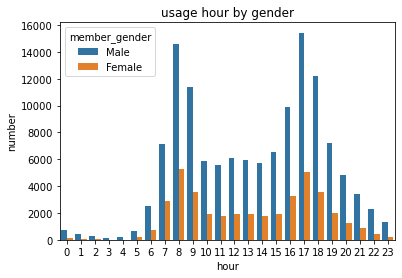

In [81]:
user_hour = ford_data.groupby(['startpoint', 'member_gender']).size().reset_index()
sb.countplot(data = ford_data, x = 'startpoint', hue = 'member_gender')
plt.title('usage hour by gender')
plt.xlabel('hour')
plt.ylabel('number')

From this plot, we can see that male users take their trips mostly around 5PM , while female users take their trips equally either at 8AM or 5PM

### Q2: which week day has the highest trip durations ?

Text(0, 0.5, 'trip duration in minutes')

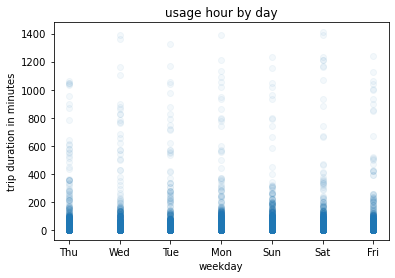

In [82]:
plt.scatter(data = ford_data, x = 'weekday', y = 'minutes', alpha=1/20);
plt.title('usage hour by day')
plt.xlabel('weekday')
plt.ylabel('trip duration in minutes')

This plot shows that although thursdays have the highest number of the trips, the longest trips are taken during saturdays and wednesdays

### Q3: who takes longer trips: subscribers and customers ? 

Text(0, 0.5, 'user type')

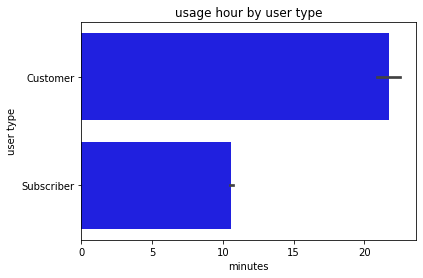

In [83]:
sns.barplot(data=ford_data, y='user_type', x='minutes', color='blue')
plt.title('usage hour by user type')
plt.xlabel('minutes')
plt.ylabel('user type')

from this plot, we can see that customers actually take longer trips than subscribers, with an average of 20 minutes per trip

### Q4: what are the most frequent genders for each user type ?

Text(0, 0.5, 'number')

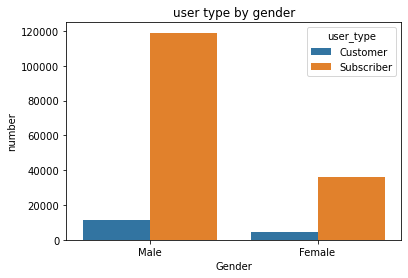

In [84]:
sb.countplot(data = ford_data, x = 'member_gender', hue = 'user_type')
plt.title('user type by gender')
plt.xlabel('Gender')
plt.ylabel('number')

we can see from this plot that the majority of both female and male users are subscribed to the service

### Multivariate Exploration

Multivariate analysis is a form of data analysis where the data being analyzed consists of two or more variables and the relations between them 

### Q1: what are the durations that each user type ( male or female ) take on each trip ?

Text(0, 0.5, 'duration in minutes')

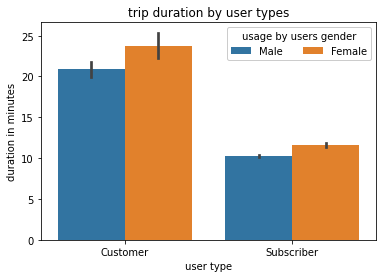

In [85]:
ax = sb.barplot(data = ford_data, x = 'user_type', y = 'minutes', hue = 'member_gender');
ax.legend(loc = 'upper right', ncol = 3, framealpha = 1, title = 'usage by users gender' );
plt.title('trip duration by user types')
plt.xlabel('user type')
plt.ylabel('duration in minutes')

from this plot, we can see that customers have the longest trip durations per week

### Q2: what is the latest hours that users , females or males take their trips on ?

Text(0, 0.5, 'gender')

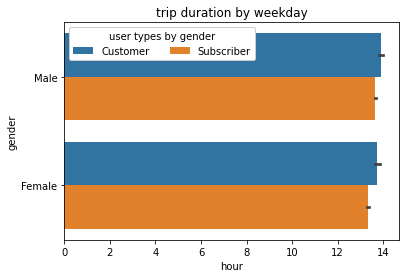

In [87]:
ax = sb.barplot(data = ford_data, x = 'endpoint', y = 'member_gender', hue = 'user_type')
ax.legend(loc = 'upper left', ncol = 3, framealpha = 1, title = 'user types by gender' )
plt.title('trip duration by weekday')
plt.xlabel('hour')
plt.ylabel('gender')

This plot shows that male customers are likley to take later trips, even into the evening 

### Q3: what are number of trips for each age group ?

Text(0, 0.5, 'trips number')

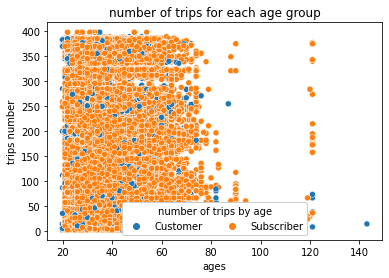

In [35]:
ax = sb.scatterplot(data = ford_data, x = ford_data['ages'], y = ford_data['start_station_id'], hue = 'user_type')
ax.legend(loc = 8, ncol = 3, framealpha = 1, title = 'number of trips by age' )
plt.title('number of trips for each age group')
plt.xlabel('ages')
plt.ylabel('trips number')

this plot shows that customers between the ages of 20-40 take the highest number of trips 

###  Conclusion

from the visual analysis that was conducted in this project , we can see that most of the users are subscribed to the service with a percentage of around 91%. additionally, we can see that most of the trips are taken at 8AM and 5PM which can indicate taht the service is used as a means of transportation to and from work. We can also see that most of the most of the subscribers are males and they also have the highest trip durations. As for the age group with the most trips, it has been proven to be the age group between 20-40 years. And finally, we can see that the day of the week with the highest number of trips is thursday, followed closely by tuesday and wednesday. 

In [36]:
ford_data.to_csv('ford_clean.csv')

In [37]:
!jupyter nbconvert communicate_finds.ipynb --to slides --post serve  --no-input --no-prompt

[NbConvertApp] Converting notebook communicate_finds.ipynb to slides
[NbConvertApp] Writing 734772 bytes to communicate_finds.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "C:\Users\96658\anaconda\Scripts\jupyter-nbconvert-script.py", line 10, in <module>
    sys.exit(main())
  File "C:\Users\96658\anaconda\lib\site-packages\jupyter_core\application.py", line 254, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "C:\Users\96658\anaconda\lib\site-packages\traitlets\config\application.py", line 845, in launch_instance
    app.start()
  File "C:\Users\96658\anaconda\lib\site-packages\nbconvert\nbconvertapp.py", line 350, in start
    self.convert_notebooks()
  File "C:\Users\96658\anaconda\lib\site-packages\nbconvert\nbconvertapp.py", line 524, in convert_notebooks
    self.convert_single_notebook(notebook_filename)
  File "C:\User